In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Initial configuration of cells

**Grid Size** followed by **coordinates** of active cells

Coordinates are (down,right) from top left corner of grid

### Still Lifes

In [2]:
Block = [(4,4), (1,1),(1,2),(2,1),(2,2)]
Beehive = [(5,6),(1,2),(1,3),(2,1),(2,4),(3,2),(3,3)]
Loaf = [(6,6),(1,2),(1,3),(2,1),(2,4),(3,2),(3,4),(4,3)]
Boat = [(5,5),(1,1),(1,2),(2,1),(2,3),(3,2)]
Tub = [(5,5),(1,2),(2,1),(2,3),(3,2)]

### Oscillators

In [3]:
Blinker = [(5,5),(1,2),(2,2),(3,2)]
Toad = [(6,6),(2,2),(2,3),(2,4),(3,1),(3,2),(3,3)]
Beacon = [(6,6),(1,1),(1,2),(2,1),(2,2),(3,3),(3,4),(4,3),(4,4)]
Pulsar = [(17,17),(2,4),(2,5),(2,6),(2,10),(2,11),(2,12),(7,4),(7,5),(7,6),(7,10),(7,11),(7,12),(9,4),(9,5),(9,6),(9,10),(9,11),(9,12),(14,4),(14,5),(14,6),(14,10),(14,11),(14,12),(10,2),(11,2),(12,2),(10,7),(11,7),(12,7),(10,9),(11,9),(12,9),(10,14),(11,14),(12,14),(4,2),(5,2),(6,2),(4,7),(5,7),(6,7),(4,9),(5,9),(6,9),(4,14),(5,14),(6,14)]

### Spaceships

In [4]:
Glider = [(15,15),(0,0),(0,2),(1,1),(1,2),(2,1)]
LightWeightSpaceship = [(20,20),(2,4),(2,5),(3,2),(3,3),(3,5),(3,6),(4,2),(4,3),(4,4),(4,5),(5,3),(5,4)]
MiddleWeightSpaceship = [(20,20),(3,4),(3,5),(4,1),(4,2),(4,3),(4,5),(4,6),(5,1),(5,2),(5,3),(5,4),(5,5),(6,2),(6,3),(6,4)]
HeavyWeightSpaceship = [(20,20),(2,2),(2,3),(2,4),(2,5),(3,1),(3,2),(3,3),(3,4),(3,5),(3,6),(4,1),(4,2),(4,3),(4,4),(4,6),(4,7),(5,5),(5,6)]

### Guns

In [5]:
GliderGun = [(40,40),(5,1),(5,2),(6,1),(6,2),(5,11),(6,11),(7,11),(4,12),(8,12),(3,13),(9,13),(3,14),(9,14),(6,15),(4,16),(8,16),(5,17),(6,17),(7,17),(6,18),(3,22),(4,22),(5,22),(3,21),(4,21),(5,21),(2,23),(6,23),(1,25),(2,25),(6,25),(7,25),(3,36),(4,36),(3,35),(4,35)]

## Select Configuration

In [6]:
configuration = Pulsar

In [7]:
m,n = configuration[0]           # Size of grid m*n
grid = np.zeros((m,n))          

for i in configuration[1:]:
    grid[i] += 1
print(grid)
neighbours = np.zeros((m,n))    # Stores the number of Neighbours of each cell

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Start with Computing matrix storing number of neighbours

In [8]:
def analyse():
    global n, grid, neighbours
    for i in range(n):
        for j in range(n):
            for k in range(-1,2):
                for l in range (-1,2):
                    if((k == 0 and l == 0) or i+k < 0 or i+k == n or j+l < 0 or j+l == n):
                        continue
                    if(grid[i+k][j+l] == 1):
                        neighbours[i][j] += 1                                

### Updating the Grid

In [9]:
def update():
    global n, grid, neighbours
    for i in range(n):
        for j in range(n):
            if(neighbours[i][j] == 3):
                grid[i][j] = 1
            elif(neighbours[i][j] == 2 and grid[i][j] == 1):
                grid[i][j] = 1
            else:
                grid[i][j] = 0
    neighbours = np.zeros((n,n))     

In [10]:
def animate(x):
    global n, grid, neighbours
    analyse()
    update()    
    im.set_array(grid)
    return im

<IPython.core.display.Javascript object>


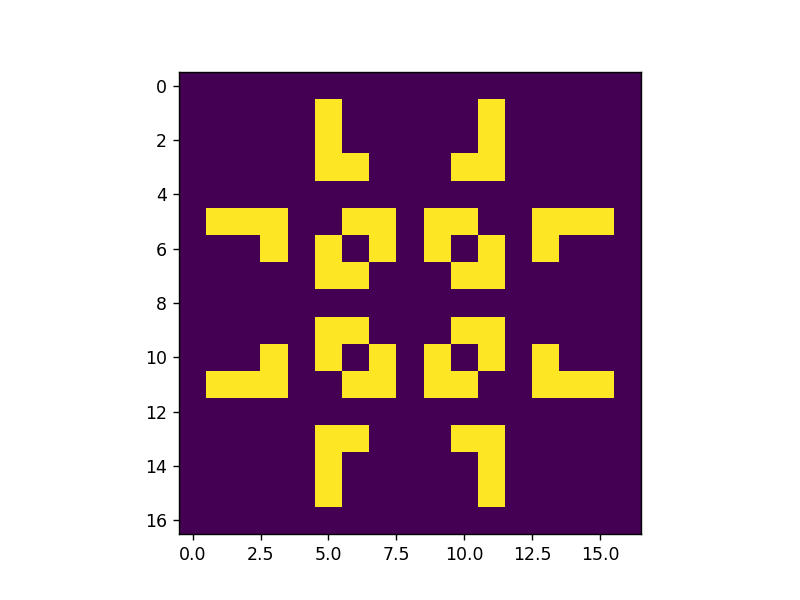

In [11]:
figure, axes = plt.subplots()
im = plt.imshow(grid, animated = True)
#figure.set_size_inches(7, 5)                 # To Change figure size

animation = FuncAnimation(figure, animate, frames = 100, interval = 500, blit = True)
plt.show()
#animation.save('gg.mp4', writer = 'ffmpeg', fps = 4, dpi = 250)  # For Saving animation

### Alternate definition of functions (But I prefer the above one)
This one involves **padding** the grid, hence reducing number of **if** statements

In [ ]:
def analyse():                   # Computes neighbours matrix
    global n, grid, neighbours
    for i in range(1,n+1):
        for j in range(1,n+1):
            for k in range(-1,2):
                for l in range (-1,2):
                    if(grid[i+k][j+l] == 1 and (k != 0 or l != 0)):
                        neighbours[i-1][j-1] += 1                           

In [ ]:
def update():
    global n, grid, neighbours
    for i in range(1,n+1):
        for j in range(1,n+1):
            if(neighbours[i-1][j-1] == 3):
                grid[i][j] = 1
            elif(neighbours[i-1][j-1] == 2 and grid[i][j] == 1):
                grid[i][j] = 1
            else:
                grid[i][j] = 0
    neighbours = np.zeros((n,n))                                    

In [ ]:
def animate(x):
    global n, grid, neighbours
    grid = np.pad(grid, ((1,1),(1,1)), 'constant')
    analyse()
    update()    
    grid = grid[1:n+1,1:n+1]
    im.set_array(grid)
    return im